# Tutorial 6: Future regressors

To model future regressors, both past and future values of these regressors have to be known. So in contrast to the lagged regressors in the previous tutorial, future regressors also have a forecasted value for the future in addition to the historic values.

In [1]:
import pandas as pd

# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial04.csv")
df.head()

,ds,y,temperature
0,2015-01-01,64.92,277.00
1,2015-01-02,58.46,277.95
2,2015-01-03,63.35,278.83
3,2015-01-04,50.54,279.64
4,2015-01-05,64.89,279.05


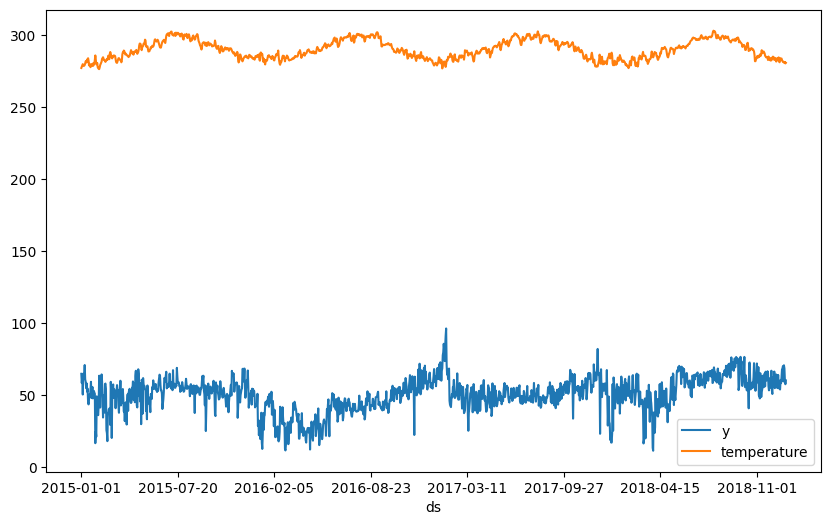

In [2]:
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

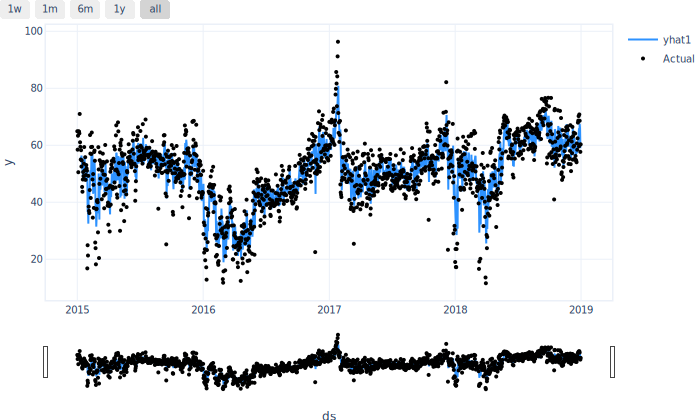

In [3]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("plotly-static")

# Add the new future regressor
m.add_future_regressor("temperature")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

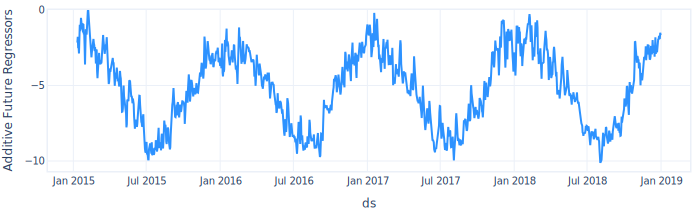

In [4]:
m.plot_components(forecast, components=["future_regressors"])

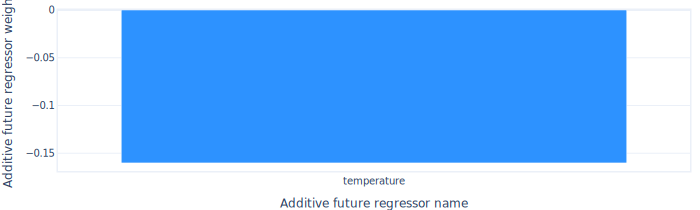

In [5]:
m.plot_parameters(components=["future_regressors"])

In [6]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,36.102451,45.784710,0.222547,0.0,0
1,33.973568,43.057194,0.200457,0.0,1
2,32.275692,41.063568,0.183792,0.0,2
3,29.880583,38.180260,0.161229,0.0,3
4,27.537054,35.115955,0.138702,0.0,4
...,...,...,...,...,...
168,4.842709,6.438596,0.005013,0.0,168
169,4.883170,6.518759,0.005086,0.0,169
170,4.834648,6.401788,0.005007,0.0,170
171,4.839586,6.429725,0.005016,0.0,171


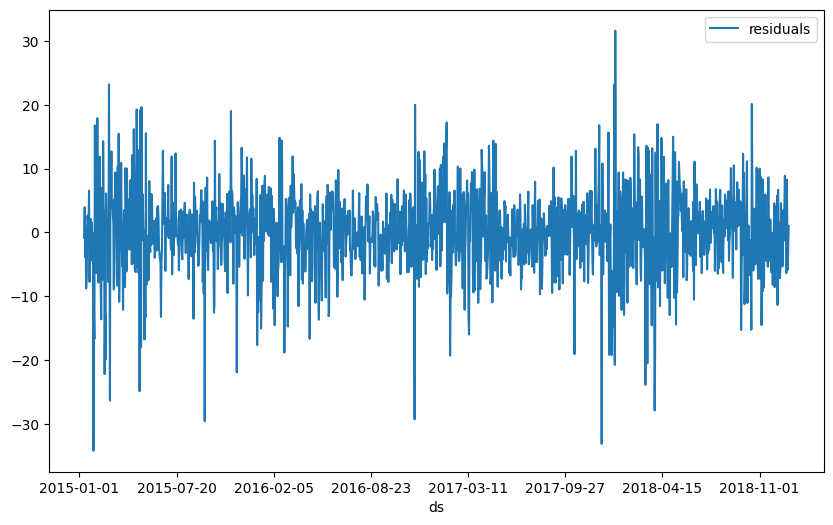

In [7]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))